## **Artrya Coding Assignment**

This is my step by step approach to the Artrya Coding Assignment. I am using both markdown and #s within my code to explain my process for easier review.

Since I already have the libraries installed, I am going to the next step to run the necessary libraries that I think are essential for this assignment i.e pandas, json, os, seaborn, matplotlib etc

In [70]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

Read the primary dataset provided

In [71]:
# Load the primary dataset
with open('artrya_coding_interview_primary_dataset.json') as f:
    primary_data = json.load(f)

# Convert to a DataFrame for easier manipulation
primary_df = pd.DataFrame(primary_data)

Read the inclusion and exclusion files

In [72]:
# Load the inclusion and exclusion files
inclusion_df = pd.read_excel('inclusions.xlsx')
exclusion_df = pd.read_excel('exclusions.xlsx')

Now, I am going to do some data exploration to understand the structure of the data

In [73]:
# Display the first few rows of the primary dataset
print(primary_df.head())

# Display the first few rows of the inclusion and exclusion datasets
print(inclusion_df.head())
print(exclusion_df.head())

                                           study_uid     site_id sex  \
0  1.3.6.1.4.1.55648.2752254752403021610367407461...  segmed_301   M   
1  1.3.6.1.4.1.55648.2889100360041019015231938454...  segmed_301   M   
2  1.3.6.1.4.1.55648.6565454722801275633480891818...  segmed_301   F   
3  1.3.6.1.4.1.55648.3072063956747364744227314861...  segmed_301   M   
4  1.3.6.1.4.1.55648.9664364864818381877752933642...  segmed_301   F   

                 race_mapped               ethnicity manufacturer_mapped  \
0                      White  Not Hispanic or Latino             Philips   
1  Black or African American  Not Hispanic or Latino             Philips   
2                      White  Not Hispanic or Latino             Philips   
3  Black or African American  Not Hispanic or Latino             Philips   
4  Black or African American  Not Hispanic or Latino             Philips   

           model calcium_score_modified  calcium_score_risk_cat  \
0        iCT 256                    170  mo

In [74]:
# Check data types
print(primary_df.dtypes)
print(inclusion_df.dtypes)
print(exclusion_df.dtypes)

study_uid                 object
site_id                   object
sex                       object
race_mapped               object
ethnicity                 object
manufacturer_mapped       object
model                     object
calcium_score_modified    object
calcium_score_risk_cat    object
stenosis_severity         object
study_id                  object
age_generated             object
dates_shifted             object
mod_patient_id            object
dtype: object
study_id    int64
dtype: object
study_id    int64
dtype: object


In [75]:
# Explore the dataset structure
num_rows, num_columns = primary_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("Variable names:", primary_df.columns.tolist())

# Display summary statistics
print(primary_df.describe(include='all'))

Number of rows: 798
Number of columns: 14
Variable names: ['study_uid', 'site_id', 'sex', 'race_mapped', 'ethnicity', 'manufacturer_mapped', 'model', 'calcium_score_modified', 'calcium_score_risk_cat', 'stenosis_severity', 'study_id', 'age_generated', 'dates_shifted', 'mod_patient_id']
                                                study_uid        site_id  sex  \
count                                                 798            798  798   
unique                                                798              6    2   
top     1.3.6.1.4.1.55648.2752254752403021610367407461...  segmed_130000    F   
freq                                                    1            342  409   

       race_mapped               ethnicity manufacturer_mapped  \
count          798                     798                 798   
unique           6                       3                   4   
top          White  Not Hispanic or Latino             SIEMENS   
freq           604                     672 

Now I am going to provide the reviewer an idea of unique categories for all categorical variables

In [76]:
# Identify unique categories for categorical variables
categorical_cols = primary_df.select_dtypes(include=['object']).columns
unique_categories = {col: primary_df[col].unique() for col in categorical_cols}

# Display unique categories
for col, categories in unique_categories.items():
    print(f"\nUnique categories for {col}:")
    print(categories)


Unique categories for study_uid:
['1.3.6.1.4.1.55648.275225475240302161036740746140344769830'
 '1.3.6.1.4.1.55648.288910036004101901523193845407063171393'
 '1.3.6.1.4.1.55648.65654547228012756334808918181245348537'
 '1.3.6.1.4.1.55648.307206395674736474422731486142859555786'
 '1.3.6.1.4.1.55648.96643648648183818777529336427440461299'
 '1.3.6.1.4.1.55648.188681021671110490763983665944936221059'
 '1.3.6.1.4.1.55648.113559449098318303433334611274718272676'
 '1.3.6.1.4.1.55648.34838911057139740760494052244832163229'
 '1.3.6.1.4.1.55648.55007699658693768142124707374300230141'
 '1.3.6.1.4.1.55648.152461431292713702095807256374306670687'
 '1.3.6.1.4.1.55648.69662905317627032694316315257905432991'
 '1.3.6.1.4.1.55648.257565359462170859134071193419730498812'
 '1.3.6.1.4.1.55648.13320254863427351012544628332867221381'
 '1.3.6.1.4.1.55648.54316116960039363275727840814735129833'
 '1.3.6.1.4.1.55648.113327581026766105543761236635157659140'
 '1.3.6.1.4.1.55648.73144255300557589641485381272971904633

Next we shall visualize the data, to get a glimpse of what it looks like using different visuals appropriate for different data types

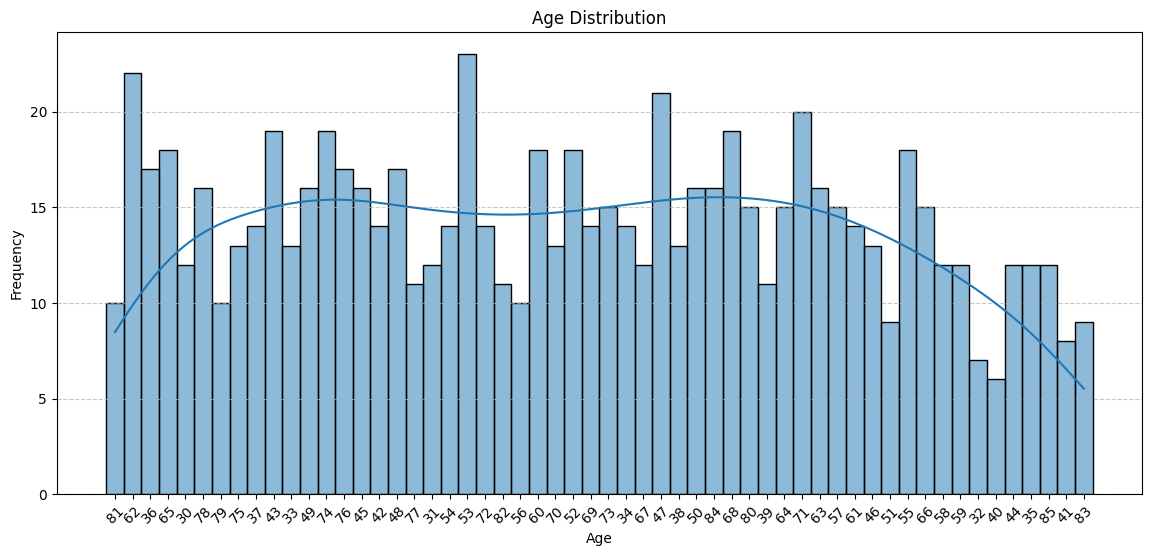

In [77]:
# Visualize age distribution
plt.figure(figsize=(14, 6))
sns.histplot(primary_df['age_generated'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/nj/stz8sgl12b75kcnbqpzl5v2w0000gp/T/ipykernel_72403/797440885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=primary_df, x='sex', palette='pastel')


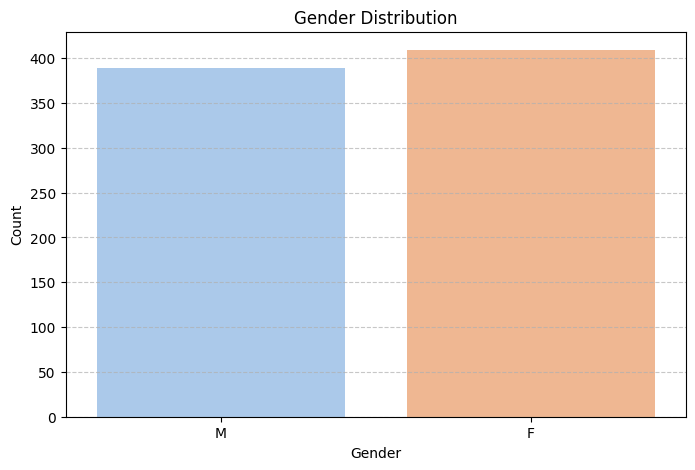

In [78]:
# Visualize gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=primary_df, x='sex', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


/var/folders/nj/stz8sgl12b75kcnbqpzl5v2w0000gp/T/ipykernel_72403/2361215419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=primary_df, y='race_mapped', palette='muted')


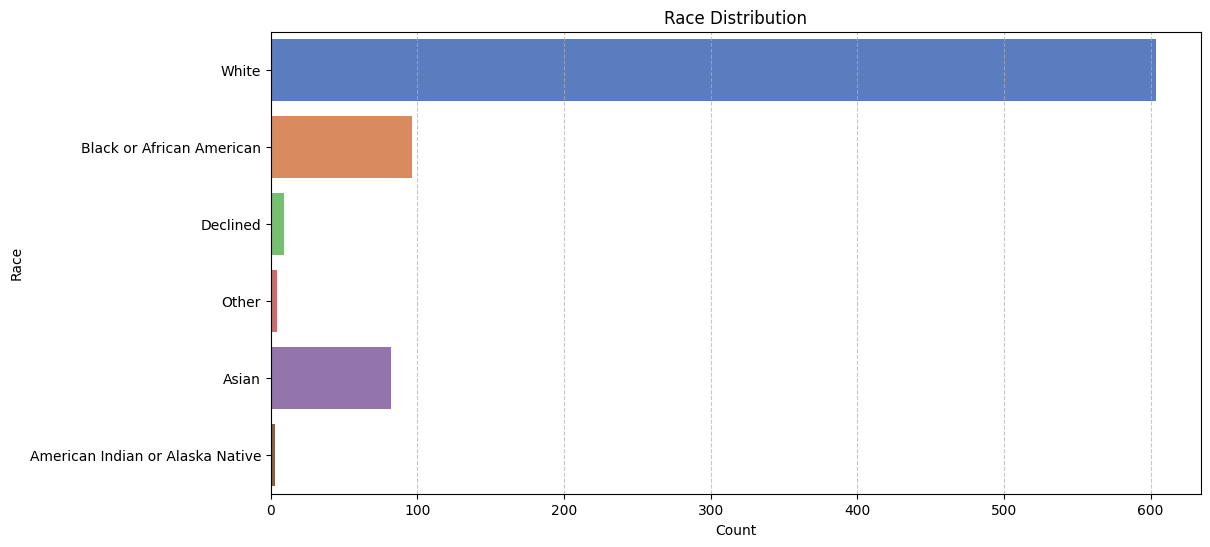

In [79]:
# Visualize race distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=primary_df, y='race_mapped', palette='muted')
plt.title('Race Distribution')
plt.xlabel('Count')
plt.ylabel('Race')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/var/folders/nj/stz8sgl12b75kcnbqpzl5v2w0000gp/T/ipykernel_72403/3329421014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=primary_df, x='ethnicity', palette='Set2')


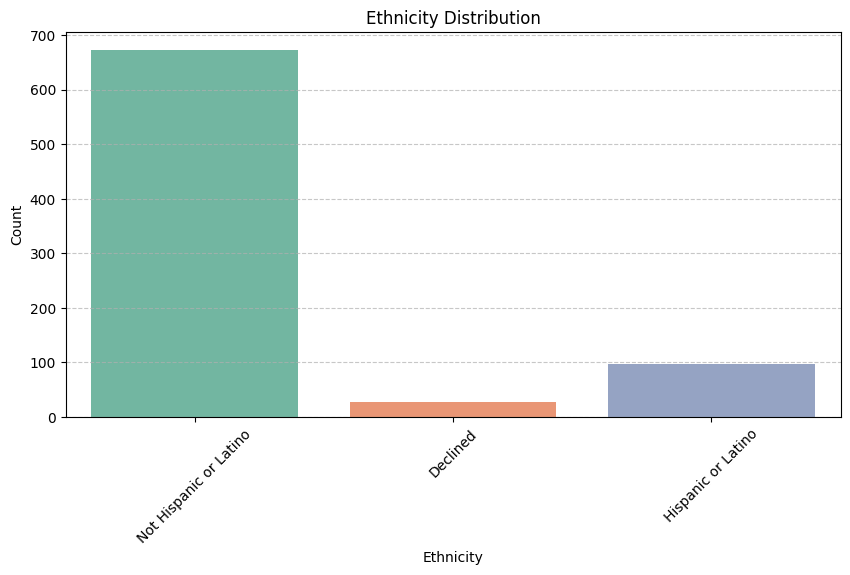

In [80]:
# Visualize ethnicity distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=primary_df, x='ethnicity', palette='Set2')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


Now lets look at race and gender by stenosis severity using tabular summary and also assess the relationship between calcium score numerical ranges and the corresponding risk categories.

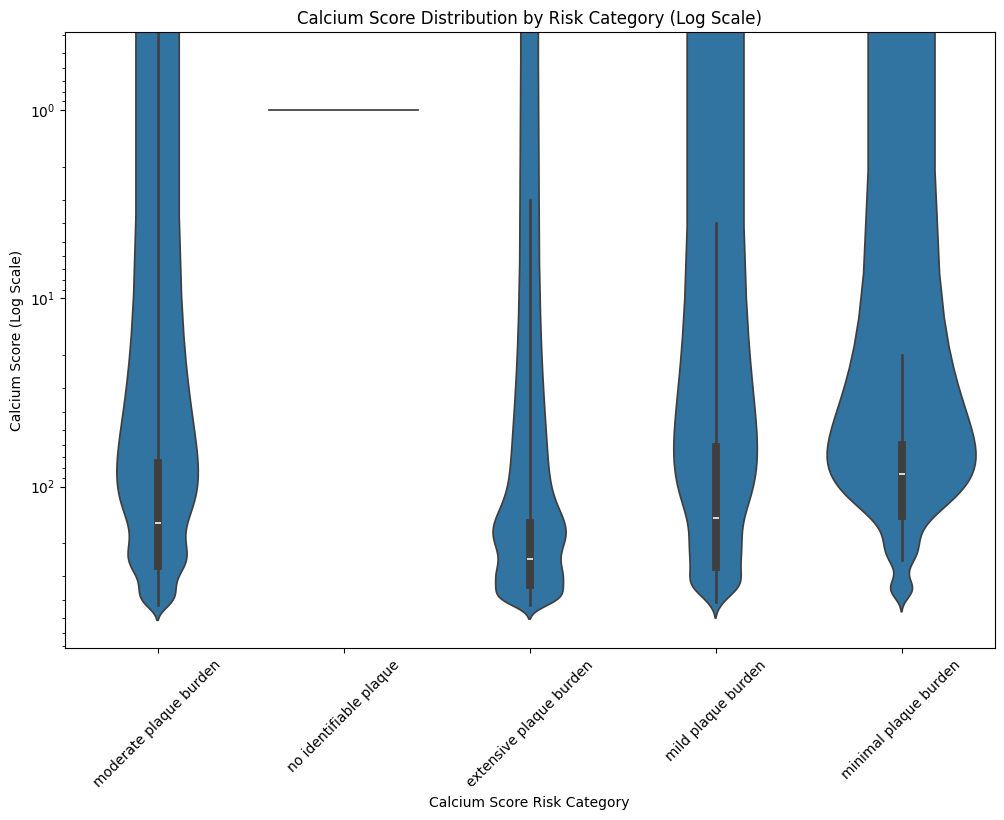

In [81]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a violin plot with a logarithmic scale for the calcium scores
sns.violinplot(x='calcium_score_risk_cat', y='calcium_score_modified', data=primary_df)
plt.yscale('log')  # Apply logarithmic scale to the y-axis

# Add titles and labels
plt.title('Calcium Score Distribution by Risk Category (Log Scale)')
plt.xlabel('Calcium Score Risk Category')
plt.ylabel('Calcium Score (Log Scale)')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [82]:
# Group by risk category and calculate descriptive statistics for calcium scores
calcium_score_stats = primary_df.groupby('calcium_score_risk_cat')['calcium_score_modified'].describe()
calcium_score_stats

,count,unique,top,freq
calcium_score_risk_cat,,,,
extensive plaque burden,212,195,445,2
mild plaque burden,147,83,80,6
minimal plaque burden,66,16,1,15
moderate plaque burden,173,133,233,4
no identifiable plaque,200,1,0,200


The distribution of calcium scores across plaque burden categories reveals diverse patterns. "Extensive" and "Moderate" plaque burdens show high variability, with a wide range of unique scores, indicating diverse calcification levels that necessitate individualized clinical assessments. In contrast, "Minimal" and "No Plaque Burden" categories exhibit concentrated scores at low or zero values, reflecting minor or absent calcification. This distribution highlights the complexity within higher burden categories and suggests the need for tailored risk management, while lower burden categories display expected uniformity in calcification absence or minimal presence.

Now we can modify our dataset by adding the new column based on the criteria provided.

In [83]:
# Load the inclusion and exclusion files
inclusion_df = pd.read_excel('inclusions.xlsx')
exclusion_df = pd.read_excel('exclusions.xlsx')

# Ensure column names exist
print("Columns in inclusion_df:", inclusion_df.columns)
print("Columns in exclusion_df:", exclusion_df.columns)

# Display unique IDs to verify
print("Unique Inclusion IDs:", inclusion_df['study_id'].unique())
print("Unique Exclusion IDs:", exclusion_df['study_id'].unique())

# Ensure the study_id column in primary_df is consistent in type
primary_df['study_id'] = primary_df['study_id'].astype(str)
inclusion_df['study_id'] = inclusion_df['study_id'].astype(str)
exclusion_df['study_id'] = exclusion_df['study_id'].astype(str)

# Function to categorize IDs
def categorize_id(row):
    if row['study_id'] in inclusion_df['study_id'].values:
        return 'include'
    elif row['study_id'] in exclusion_df['study_id'].values:
        return 'exclude'
    else:
        return 'to be determined'

# Apply the function to create a new column
primary_df['inclusion_status'] = primary_df.apply(categorize_id, axis=1)

# Display the first few rows of the updated primary DataFrame
primary_df.head()

Columns in inclusion_df: Index(['study_id'], dtype='object')
Columns in exclusion_df: Index(['study_id'], dtype='object')
Unique Inclusion IDs: [583 734 655 781 919 829 961 443 450 160 925 803 373 527 125 994 251 315
 635 286 257 796 823 990 188 622 778 438 653 950 399 293 279 842 889 100
 137 572 355 220 254 619 972 261 548]
Unique Exclusion IDs: [877 755 444 934 320 964 854 605 152 123 691 357 663 531 862 485 400 954
 331 291 377 217 407 998 894 103 898 336 575 131 383 569 411 477 670 752
 873 805 535 813 784 962 303 900 163 186 938 672 595 385 836 942 394 617
 860]


,study_uid,site_id,sex,race_mapped,ethnicity,manufacturer_mapped,model,calcium_score_modified,calcium_score_risk_cat,stenosis_severity,study_id,age_generated,dates_shifted,mod_patient_id,inclusion_status
0,1.3.6.1.4.1.55648.2752254752403021610367407461...,segmed_301,M,White,Not Hispanic or Latino,Philips,iCT 256,170,moderate plaque burden,Severe stenosis,705,81,2022-04-03,Patient_2334848834456643911,to be determined
1,1.3.6.1.4.1.55648.2889100360041019015231938454...,segmed_301,M,Black or African American,Not Hispanic or Latino,Philips,Brilliance 64,0,no identifiable plaque,Absence of CAD,961,62,2022-04-03,Patient_8849459364872597030,include
2,1.3.6.1.4.1.55648.6565454722801275633480891818...,segmed_301,F,White,Not Hispanic or Latino,Philips,iCT 256,0,no identifiable plaque,Minimal stenosis,958,36,2022-04-03,Patient_4305062320789986397,to be determined
3,1.3.6.1.4.1.55648.3072063956747364744227314861...,segmed_301,M,Black or African American,Not Hispanic or Latino,Philips,Brilliance 64,0,no identifiable plaque,Absence of CAD,487,65,2022-04-03,Patient_2662521149688200244,to be determined
4,1.3.6.1.4.1.55648.9664364864818381877752933642...,segmed_301,F,Black or African American,Not Hispanic or Latino,Philips,iCT 256,233,moderate plaque burden,Mild stenosis,771,30,2022-04-03,Patient_6824504985757273041,to be determined


Lets check for missing values that are not in our dataset but are in the criteria files.

In [84]:
# Convert study_id columns to string just in case
primary_df['study_id'] = primary_df['study_id'].astype(str)
inclusion_df['study_id'] = inclusion_df['study_id'].astype(str)
exclusion_df['study_id'] = exclusion_df['study_id'].astype(str)

# Find missing IDs in the primary dataset
missing_inclusions = inclusion_df[~inclusion_df['study_id'].isin(primary_df['study_id'])]
missing_exclusions = exclusion_df[~exclusion_df['study_id'].isin(primary_df['study_id'])]

# Display missing IDs
print("Missing Inclusion IDs:")
print(missing_inclusions['study_id'].tolist())

print("\nMissing Exclusion IDs:")
print(missing_exclusions['study_id'].tolist())

Missing Inclusion IDs:
['160', '315', '823', '279', '137', '572', '355', '619']

Missing Exclusion IDs:
['444', '535', '617']


In [85]:
# Extract first five numeric characters from 'mod_patient_id'
primary_df['treatment_site'] = primary_df['mod_patient_id'].str.extract(r'(\d{5})')

In [86]:
# Display the first few rows of the modified DataFrame
primary_df.head()

,study_uid,site_id,sex,race_mapped,ethnicity,manufacturer_mapped,model,calcium_score_modified,calcium_score_risk_cat,stenosis_severity,study_id,age_generated,dates_shifted,mod_patient_id,inclusion_status,treatment_site
0,1.3.6.1.4.1.55648.2752254752403021610367407461...,segmed_301,M,White,Not Hispanic or Latino,Philips,iCT 256,170,moderate plaque burden,Severe stenosis,705,81,2022-04-03,Patient_2334848834456643911,to be determined,23348
1,1.3.6.1.4.1.55648.2889100360041019015231938454...,segmed_301,M,Black or African American,Not Hispanic or Latino,Philips,Brilliance 64,0,no identifiable plaque,Absence of CAD,961,62,2022-04-03,Patient_8849459364872597030,include,88494
2,1.3.6.1.4.1.55648.6565454722801275633480891818...,segmed_301,F,White,Not Hispanic or Latino,Philips,iCT 256,0,no identifiable plaque,Minimal stenosis,958,36,2022-04-03,Patient_4305062320789986397,to be determined,43050
3,1.3.6.1.4.1.55648.3072063956747364744227314861...,segmed_301,M,Black or African American,Not Hispanic or Latino,Philips,Brilliance 64,0,no identifiable plaque,Absence of CAD,487,65,2022-04-03,Patient_2662521149688200244,to be determined,26625
4,1.3.6.1.4.1.55648.9664364864818381877752933642...,segmed_301,F,Black or African American,Not Hispanic or Latino,Philips,iCT 256,233,moderate plaque burden,Mild stenosis,771,30,2022-04-03,Patient_6824504985757273041,to be determined,68245


In [87]:
# Save the modified DataFrame to a CSV file
primary_df.to_csv('modified_primary_dataset.csv', index=False)

**Conclusion**

If I was to design a study where it would be useful to collect race / ethnicity in as much detail as possible, I would strongly consider both the scientific objectives and the social and cultural contexts of the study population. By implementing a detailed and culturally sensitive approach to collecting race and ethnicity data(where I consider elements such as detailed subject self-identification, additional options such as "other", expansion of sub-options such as Asian: Chinese, Indian, Filipino, Vietnamese, Korean, Japanese, etc. Hispanic or Latino: Mexican, Puerto Rican, Cuban, Salvadoran, Dominican, etc. African: Nigerian, Ethiopian, Somali, Ghanaian, etc. Middle Eastern or North African: Egyptian, Iranian, Syrian, Lebanese, etc.), I can gain a more nuanced understanding of health disparities, cultural influences, and social determinants of health. This careful categorization can ultimately lead to more targeted and effective interventions.

**Author:**

**Fabian Msafiri**